<a href="https://colab.research.google.com/github/1kalyan/DataWarehouseDataMining/blob/main/Lab1/lab1EachSymbol_DWDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch and Save symbol.csv


In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install required packages (only needed once in Colab)
import requests
import csv
import time
import pandas as pd

# Step 3: Function to fetch and save stock data
def fetch_and_save_stock_data(symbol, from_date, to_date, items_per_page=50):
    symbol = symbol.upper()
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    all_data = []

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 10
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")
        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}: HTTP {response.status_code}")
            break

        data = response.json()
        stock_data = data.get('result', {}).get('data', [])

        if not stock_data:
            print(f"No more data found for {symbol} at page {page_no}.")
            break

        all_data.extend(stock_data)
        page_no += 1
        time.sleep(0.5)

    if all_data:
        df = pd.DataFrame(all_data)
        save_path = f'/content/drive/MyDrive/DataWarehouseDataMining/{symbol}.csv'
        df.to_csv(save_path, index=False)
        print(f"Data for {symbol} saved to: {save_path}")
    else:
        print(f"No data found for {symbol}")

# Step 4: Take input from the user
user_symbol = input("Enter stock symbol: ").strip().upper()
from_date = "2020-01-01"
to_date = "2025-05-19"

# Step 5: Fetch and save
fetch_and_save_stock_data(user_symbol, from_date, to_date)


Mounted at /content/drive
Enter stock symbol: ADBL
Fetching ADBL, page 1 | Status: 200
Fetching ADBL, page 2 | Status: 200
Fetching ADBL, page 3 | Status: 200
Fetching ADBL, page 4 | Status: 200
Fetching ADBL, page 5 | Status: 200
Fetching ADBL, page 6 | Status: 200
Fetching ADBL, page 7 | Status: 200
Fetching ADBL, page 8 | Status: 200
Fetching ADBL, page 9 | Status: 200
Fetching ADBL, page 10 | Status: 200
Fetching ADBL, page 11 | Status: 200
Fetching ADBL, page 12 | Status: 200
Fetching ADBL, page 13 | Status: 200
Fetching ADBL, page 14 | Status: 200
Fetching ADBL, page 15 | Status: 200
Fetching ADBL, page 16 | Status: 200
Fetching ADBL, page 17 | Status: 200
Fetching ADBL, page 18 | Status: 200
Fetching ADBL, page 19 | Status: 200
Fetching ADBL, page 20 | Status: 200
Fetching ADBL, page 21 | Status: 200
Fetching ADBL, page 22 | Status: 200
Fetching ADBL, page 23 | Status: 200
Fetching ADBL, page 24 | Status: 200
Fetching ADBL, page 25 | Status: 200
Fetching ADBL, page 26 | Status: 

In [2]:
user_symbol

'ADBL'

# Data Clean


In [4]:
file_path = f"/content/drive/MyDrive/DataWarehouseDataMining/{user_symbol}.csv"

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"File '{file_path}' not found in your Google Drive.")

   sn            tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
0   1  2025-05-19T00:00:00      2025-05-19    284.90     280.1        282.78   
1   2  2025-05-18T00:00:00      2025-05-18    283.50     278.0        280.36   
2   3  2025-05-15T00:00:00      2025-05-15    282.00     278.2        281.11   
3   4  2025-05-14T00:00:00      2025-05-14    285.00     280.0        281.08   
4   5  2025-05-13T00:00:00      2025-05-13    286.79     280.9        282.06   

   noOfTransactions  volume      amount  previousClosing  differenceRs  \
0               133   21693  6134099.50           280.36          2.42   
1               187   26842  7510458.40           281.11         -0.75   
2               158   26415  7412963.80           281.08          0.03   
3               169   18859  5300226.60           282.06         -0.98   
4               172   21636  6119318.96           284.27         -2.21   

   percentChange  
0           0.86  
1          -0.27  
2           0.01 

In [5]:
df.info()        # Check data types
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sn                1204 non-null   int64  
 1   tradeDate         1204 non-null   object 
 2   tradeDateString   1204 non-null   object 
 3   maxPrice          1204 non-null   float64
 4   minPrice          1204 non-null   float64
 5   closingPrice      1204 non-null   float64
 6   noOfTransactions  1204 non-null   int64  
 7   volume            1204 non-null   int64  
 8   amount            1204 non-null   float64
 9   previousClosing   1204 non-null   float64
 10  differenceRs      1204 non-null   float64
 11  percentChange     1204 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 113.0+ KB


,0
sn,0
tradeDate,0
tradeDateString,0
maxPrice,0
minPrice,0
closingPrice,0
noOfTransactions,0
volume,0
amount,0
previousClosing,0


In [6]:

df.duplicated().sum()


np.int64(0)

# Convert the daily to weekly format and plot it.



<Axes: title={'center': 'Weekly Close Price'}, xlabel='tradeDate'>

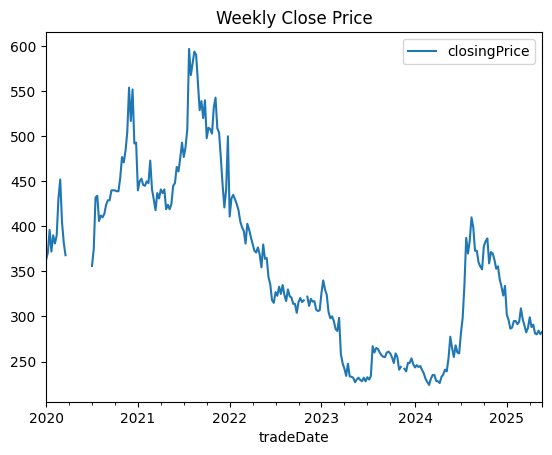

In [7]:
df['tradeDate'] = pd.to_datetime(df['tradeDate'])  # Convert it to datetime
df.set_index('tradeDate', inplace=True)            # Use it as index
weekly_df = df.resample('W').agg({'closingPrice': 'last'})
weekly_df.plot(title='Weekly Close Price')


# Convert the data to montly format and plot it.



<Axes: title={'center': 'Monthly Close Price'}, xlabel='tradeDate'>

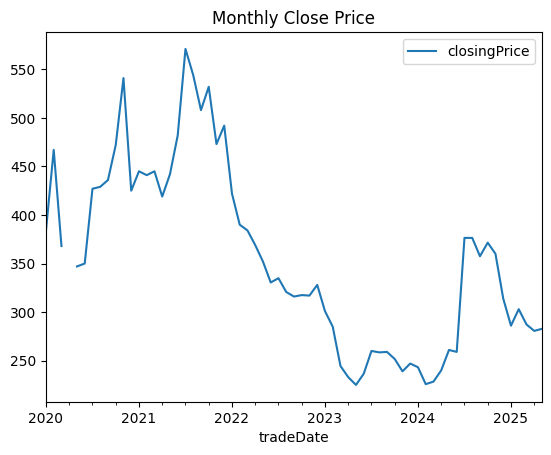

In [8]:
monthly_df = df.resample('ME').agg({'closingPrice': 'last'})
monthly_df.plot(title='Monthly Close Price')


# Moving Average

<Axes: title={'center': '14-Day Moving Average'}, xlabel='tradeDate'>

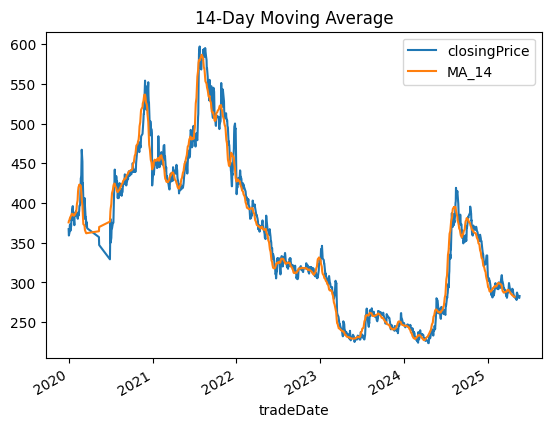

In [9]:
df['MA_14'] = df['closingPrice'].rolling(window=14).mean()
df[['closingPrice', 'MA_14']].plot(title='14-Day Moving Average')

# Weighted Moving Average

<Axes: title={'center': '14-Day Weighted Moving Average'}, xlabel='tradeDate'>

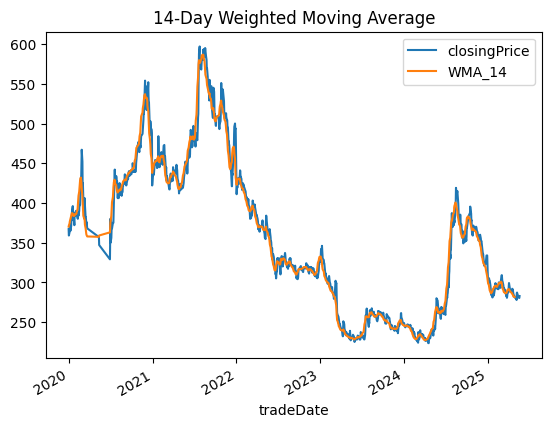

In [10]:
weights = range(1, 15)
def weighted_moving_avg(prices):
    return (prices * weights).sum() / sum(weights)


df['WMA_14'] = df['closingPrice'].rolling(window=14).apply(weighted_moving_avg, raw=True)

df[['closingPrice', 'WMA_14']].plot(title='14-Day Weighted Moving Average')

# RSI

<Axes: title={'center': 'RSI (14)'}, xlabel='tradeDate'>

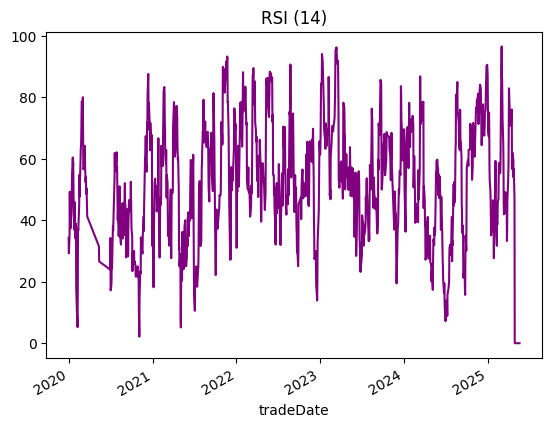

In [11]:

delta = df['closingPrice'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss

rs = rs.replace([float('inf'), -float('inf')], 100)
rs = rs.fillna(0) # Handle cases where both avg_gain and avg_loss are 0
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'].plot(title='RSI (14)', color='purple')

# OBV

<ipython-input-12-c740817d50c2>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['OBV'].iloc[0] = df['Volume'].iloc[0]
<ipython-input-12-c740817d50c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Axes: title={'center': 'On-Balance Volume'}, xlabel='tradeDate'>

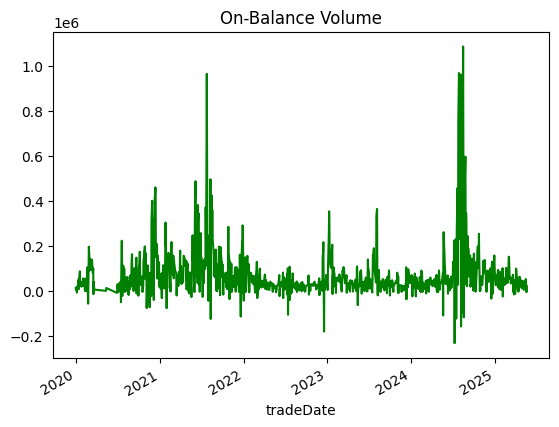

In [12]:
df['Volume'] = df['volume']
df['OBV'] = 0


price_change = df['closingPrice'].diff()


obv_volume = df['Volume'].where(price_change > 0, -df['Volume'].where(price_change < 0, 0))


if len(df) > 0:
    df['OBV'].iloc[0] = df['Volume'].iloc[0]

    df['OBV'] = obv_volume.cumsum() + df['Volume'].iloc[0] - obv_volume.iloc[0]

if len(df) > 0:
    df['OBV_calc'] = df['Volume']

    df.loc[price_change > 0, 'OBV_calc'] = df['Volume'][price_change > 0] + df['OBV_calc'].shift(1)[price_change > 0]
    df.loc[price_change < 0, 'OBV_calc'] = -df['Volume'][price_change < 0] + df['OBV_calc'].shift(1)[price_change < 0]
    df.loc[price_change == 0, 'OBV_calc'] = df['OBV_calc'].shift(1)[price_change == 0]

    # Handle the very first OBV value explicitly if it wasn't set correctly by the above
    df['OBV_calc'].iloc[0] = df['Volume'].iloc[0]

    # Now set the actual OBV column
    df['OBV'] = df['OBV_calc']
    df = df.drop(columns=['OBV_calc']) # Clean up the temporary column


df['OBV'].plot(title='On-Balance Volume', color='green')

# CCI

<Axes: title={'center': 'CCI (20)'}, xlabel='tradeDate'>

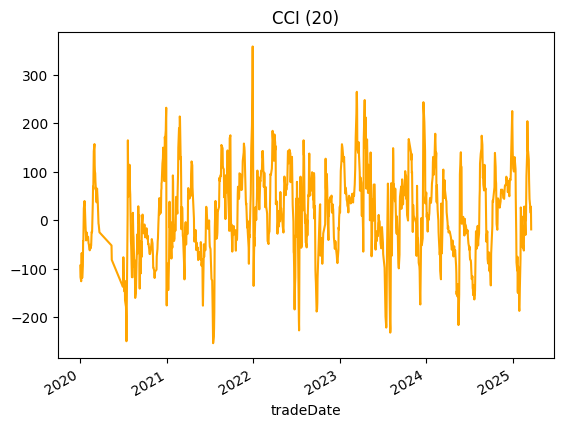

In [13]:
tp = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
tp_ma = tp.rolling(20).mean()
tp_md = (tp - tp_ma).abs().rolling(20).mean()
df['CCI'] = (tp - tp_ma) / (0.015 * tp_md)
df['CCI'].plot(title='CCI (20)', color='orange')